# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Dataset Loading and Necessary Sanity Checks:

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#increasing the columns view limit

pd.options.display.max_columns = None

In [ ]:
#reading the dataset

Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#checking the shape of the dataset

Leads.shape

(9240, 37)

In [ ]:
# We'll use this for calculating percentage of dropped rows:
initial_rows = Leads.shape[0]

In [ ]:
#checking statistics for numerical columns

Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
#checking datatypes of each variable

Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning:

In [ ]:
#replacing 'Select' value to NaN

Leads.replace('Select', np.nan, inplace=True)
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#checking the count of null values in each column

Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
#checking the percentage of null values in each column and removing columns with null values > 40%

for x,y in round(100*Leads.isnull().mean(), 2).to_dict().items():
    if y >= 40:
        Leads.drop(x, 1, inplace = True)
        
Leads.isnull().mean() * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

### Examining the columns with high null values

In [ ]:
#Examining the 'Country' column

Leads.Country.value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Canada                   0.043290
Germany                  0.043290
Kuwait                   0.043290
Nigeria                  0.043290
Sweden                   0.032468
Italy                    0.021645
China                    0.021645
Belgium                  0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
Uganda                   0.021645
Ghana                    0.021645
Netherlands              0.021645
Bangladesh               0.021645
Malaysia      

#### We can see that India + null values comprises of 97% of the total Country column, it is safe to drop the same.

In [ ]:
#dropping the Country column

Leads.drop('Country', axis = 1, inplace = True)
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [ ]:
#Examining the 'Specialization' column

Leads.Specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [ ]:
#replacing 'NaN' value to 'Not Specified'

Leads['Specialization'] = Leads['Specialization'].replace(np.nan, 'Not Specified')

In [ ]:
#grouping the Specializations in different buckets

#categorize all Management Courses
Leads.Specialization.replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'], "Management Specializations",inplace=True)

#categorize all Business Courses
Leads.Specialization.replace(['Business Administration','International Business','Rural and Agribusiness','E-Business'], "Business Specializations",inplace=True)

#categorize all Industry Courses
Leads.Specialization.replace(['IT Projects Management','Supply Chain Management','Banking, Investment And Insurance','Travel and Tourism','Media and Advertising','E-COMMERCE','Services Excellence'], "Industry Specializations",inplace=True)

Leads.Specialization.value_counts()

Management Specializations    4253
Not Specified                 3380
Industry Specializations       896
Business Specializations       711
Name: Specialization, dtype: int64

In [ ]:
#examining the Occupation column

Leads['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [ ]:
#replacing all NaN values to Not Specified

Leads['What is your current occupation'].replace(np.NaN, "Not Specified",inplace=True)
Leads['What is your current occupation'].value_counts()

Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
#Examining the Course Selection Reason column

Leads['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

#### The distribution of the data is very heavily skewed, with Better career prospects + null values = approx 100% of the total. It is safe to drop this column.

In [ ]:
#dropping the Course Selection Reason column

Leads.drop(columns=['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [ ]:
#Examining the Tags column

Leads.Tags.value_counts(normalize = True, dropna = False) * 100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

#### Since Tags is a Sales generated column we can drop the same.

In [ ]:
#dropping the Tags column

Leads.drop('Tags', axis = 1, inplace = True)

In [ ]:
#examining the City column

Leads.City.value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [ ]:
#replacing the NaN values with Mumbai

Leads['City'] = Leads['City'].replace(np.nan,'Mumbai')
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Specializations,Student,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Industry Specializations,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [ ]:
#checking the available columns

Leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
#dropping Sales generated columns and Prospect ID column

Leads.drop(['Prospect ID', 'Last Notable Activity', 'Last Activity'], axis = 1, inplace = True)

### Exploratory Data Analysis (EDA)

In [ ]:
# Checking the imbalance in the Target variable

Leads.Converted.value_counts(normalize = True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

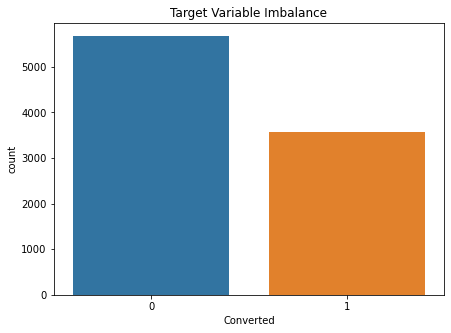

In [ ]:
#plotting the target variable
plt.figure(figsize=(7,5))
sns.countplot(x = 'Converted', data = Leads)
plt.title('Target Variable Imbalance')
plt.show()

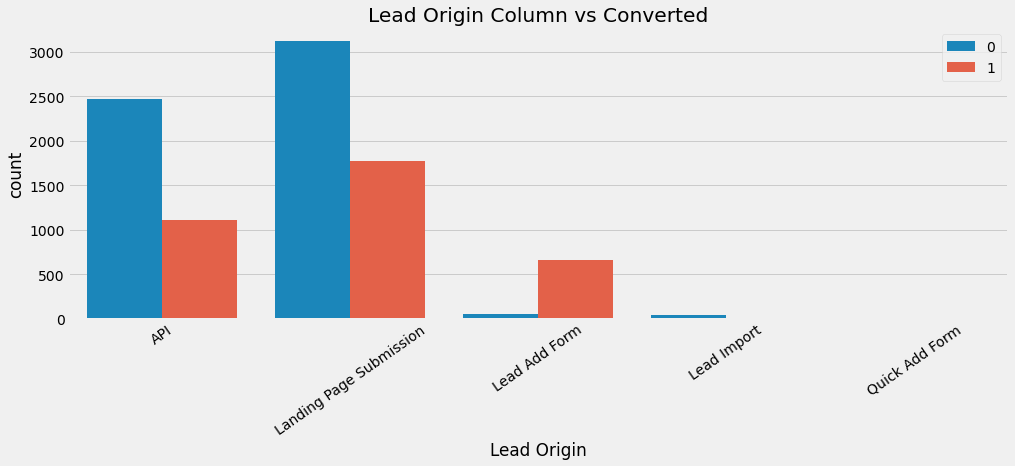

In [ ]:
#Checking Lead Origin Column

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
sns.countplot(x = 'Lead Origin', data = Leads, hue="Converted")
plt.xticks(rotation=35)
plt.legend(loc='upper right',bbox_to_anchor=[1,1])
plt.title('Lead Origin Column vs Converted')
plt.show()

1. Landing Page Submission and API get more leads in coparison to other sources.
2. Lead Add Form has the highest conversion rate.
3. Lead Import and Quick Add Form has minimal to no leads.

In [ ]:
#checking the Lead Source Column

Leads['Lead Source'].value_counts(normalize = True, dropna = False) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Live Chat             0.021645
Social Media          0.021645
youtubechannel        0.010823
Pay per Click Ads     0.010823
NC_EDM                0.010823
welearnblog_Home      0.010823
testone               0.010823
blog                  0.010823
WeLearn               0.010823
Name: Lead Source, dtype: float64

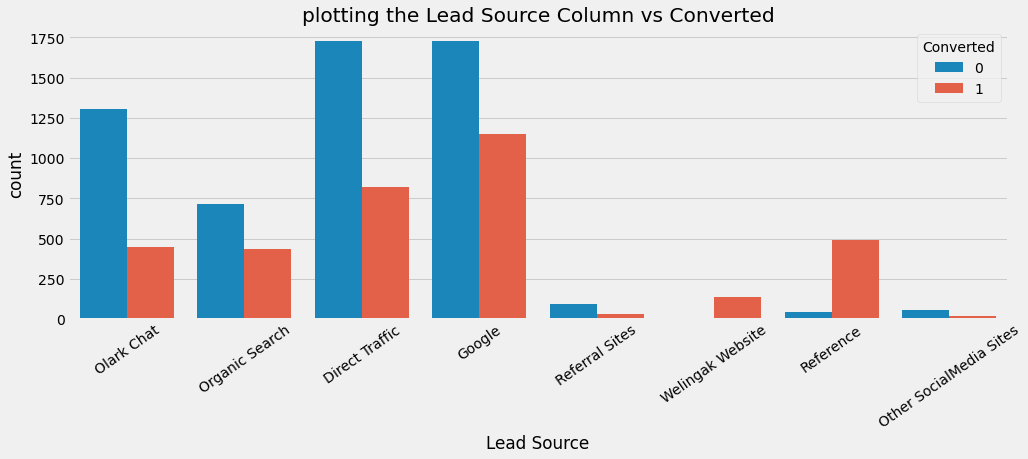

In [ ]:
#plotting the Lead Source Column

plt.figure(figsize=(15,5))
Leads['Lead Source'] = Leads['Lead Source'].replace(['google'],'Google')
Leads['Lead Source'] = Leads['Lead Source'].replace(['Facebook','blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call',\
                                                     'Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'],'Other SocialMedia Sites')
sns.countplot(x = 'Lead Source', data = Leads, hue="Converted")
plt.xticks(rotation=35)
plt.title('plotting the Lead Source Column vs Converted')
plt.show()

1. Google and Direct Traffic has maximum number of leads.
2. Leads through Reference and Welingak Website have the highest conversion rate.
3. Other Social Media Sites get the minimum leads.

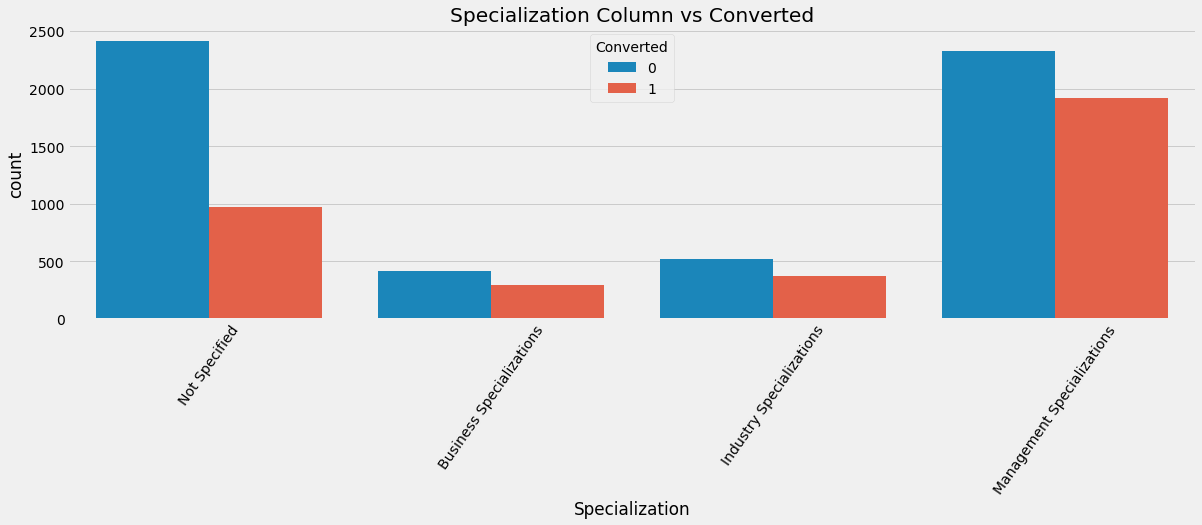

In [ ]:
#plotting the Specialization Column

plt.figure(figsize=(18,5))
sns.countplot(x = 'Specialization', data = Leads, hue="Converted")
plt.xticks(rotation=55)
plt.title('Specialization Column vs Converted')
plt.show()

1. Maximum leads come from the students who have not specified their specialization.
2. The number of leads are more from Management Specialization.

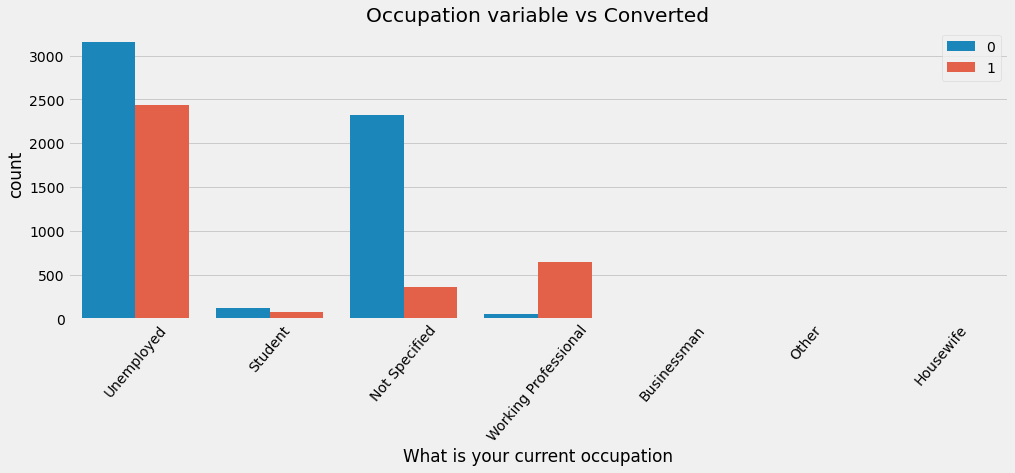

In [ ]:
#plotting the Occupation variable

plt.figure(figsize=(15,5))
sns.countplot(x = 'What is your current occupation', data = Leads, hue="Converted")
plt.xticks(rotation=50)
plt.legend(loc='upper right',bbox_to_anchor=[1,1])
plt.title('Occupation variable vs Converted')
plt.show()

1. Unemployed people tend more towards joining the course.
2. Working Professionals going for the course have a higher chance of joining the course.

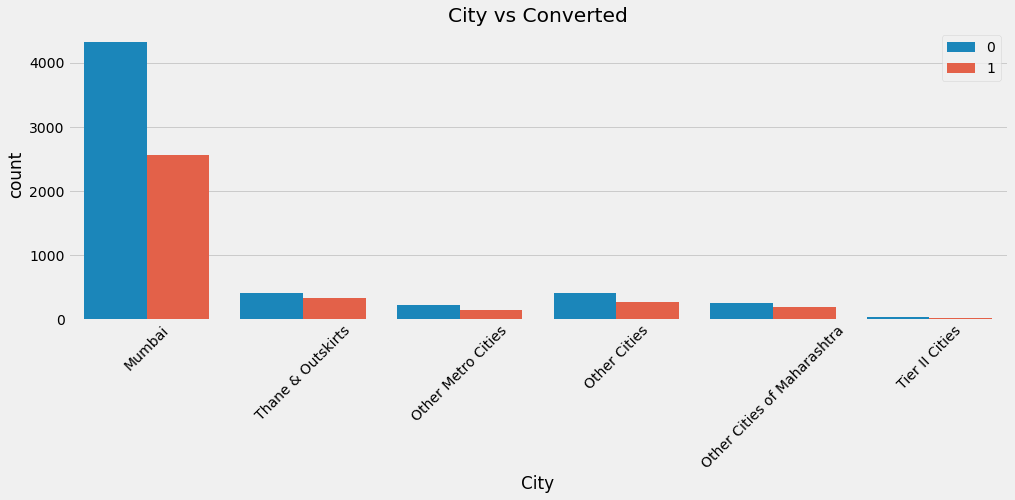

In [ ]:
#plotting the City column

plt.figure(figsize=(15,5))
sns.countplot(x = 'City', data = Leads, hue="Converted")
plt.xticks(rotation=45)
plt.legend(loc='upper right',bbox_to_anchor=[1,1])
plt.title('City vs Converted')
plt.show()

1. Maximum leads come from the people residing in Mumbai.
2. Leads from Tier II Cities are very minimal.

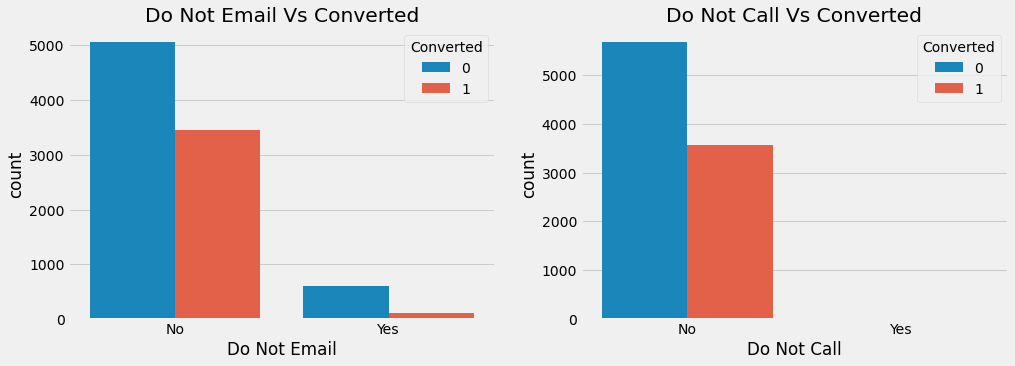

In [ ]:
#plotting the Do Not Email and Do Not Call columns

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Email',data = Leads, hue="Converted")
plt.title('Do Not Email Vs Converted')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call',data = Leads, hue="Converted")
plt.title('Do Not Call Vs Converted')

plt.show()

1. Major leads are observed from people who opted for `'Do Not Email'` and `'Do Not Call'`.
2. Conversion Rate show a similar pattern for both `'Do Not Email'` and `'Do Not Call'` options.

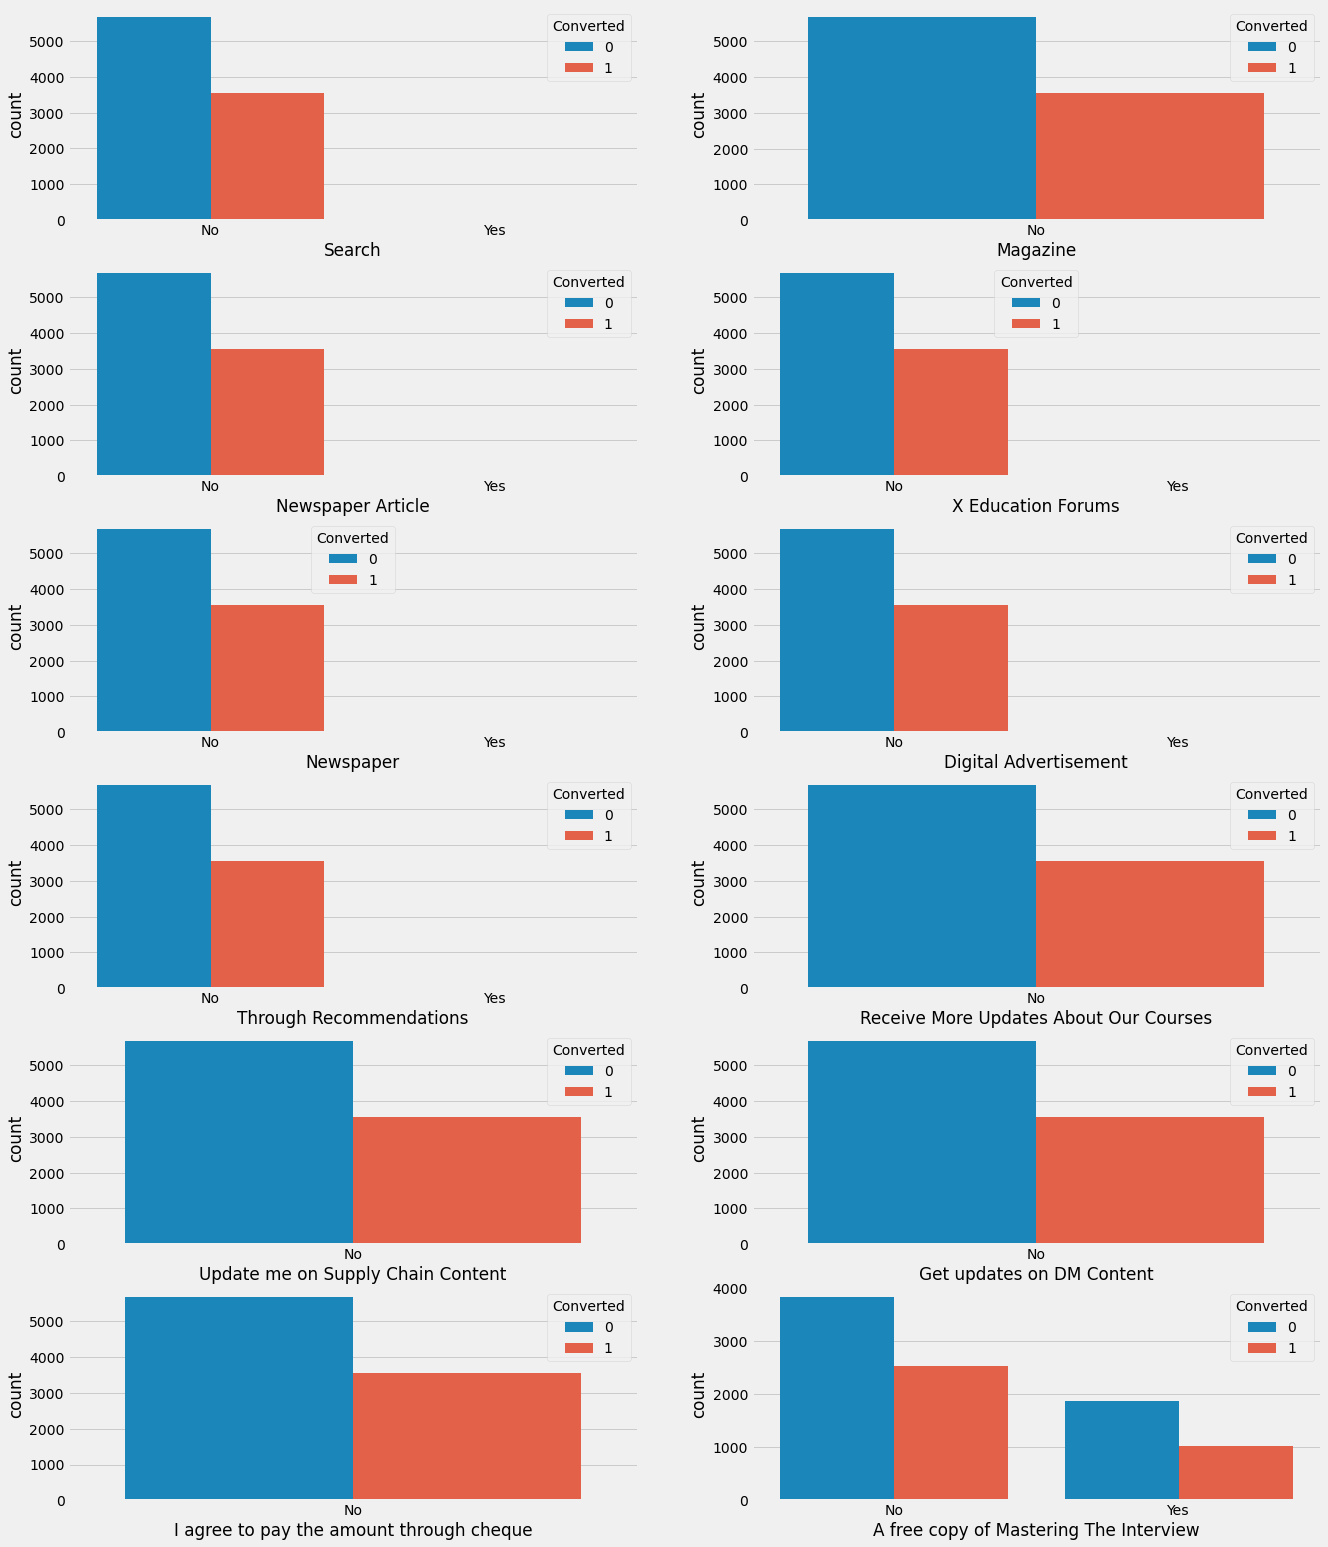

In [ ]:
plt.figure(figsize=(20,30))
plt.subplot(7,2,1)
sns.countplot(x= 'Search', data= Leads, hue= 'Converted')

plt.subplot(7,2,2)
sns.countplot(x= 'Magazine', data= Leads, hue= 'Converted')

plt.subplot(7,2,3)
sns.countplot(x= 'Newspaper Article', data= Leads, hue= 'Converted')

plt.subplot(7,2,4)
sns.countplot(x= 'X Education Forums', data= Leads, hue= 'Converted')

plt.subplot(7,2,5)
sns.countplot(x= 'Newspaper', data= Leads, hue= 'Converted')

plt.subplot(7,2,6)
sns.countplot(x= 'Digital Advertisement', data= Leads, hue= 'Converted')

plt.subplot(7,2,7)
sns.countplot(x= 'Through Recommendations', data= Leads, hue= 'Converted')

plt.subplot(7,2,8)
sns.countplot(x= 'Receive More Updates About Our Courses', data= Leads, hue= 'Converted')

plt.subplot(7,2,9)
sns.countplot(x= 'Update me on Supply Chain Content', data= Leads, hue= 'Converted')

plt.subplot(7,2,10)
sns.countplot(x= 'Get updates on DM Content', data= Leads, hue= 'Converted')

plt.subplot(7,2,11)
sns.countplot(x= 'I agree to pay the amount through cheque', data= Leads, hue= 'Converted')

plt.subplot(7,2,12)
sns.countplot(x= 'A free copy of Mastering The Interview', data= Leads, hue= 'Converted')
plt.show()

In [ ]:
#dropping the unwanted columns

Leads.drop(columns=['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'], axis = 1, inplace = True)

In [ ]:
#checking the remaining columns

Leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

### Checking the Numerical Variables

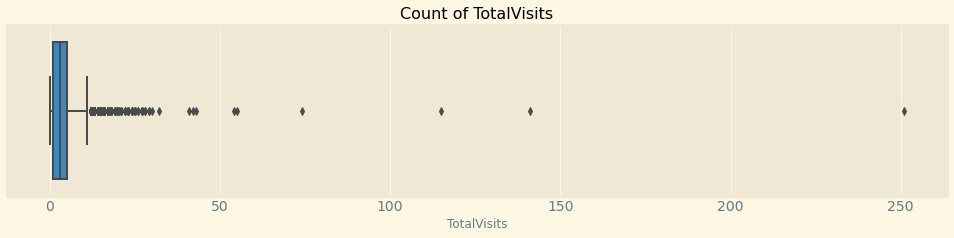

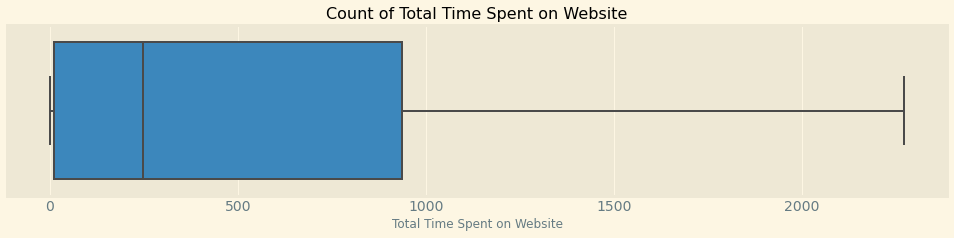

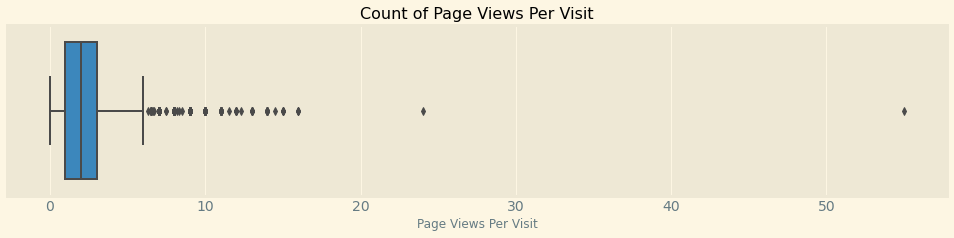

In [ ]:
plt.style.use('Solarize_Light2')
num_dict = {1:'TotalVisits',2:'Total Time Spent on Website',3:'Page Views Per Visit'}
for x,y in num_dict.items():
    plt.figure(figsize=(15,10))
    plt.subplot(3, 1, x)
    sns.boxplot(Leads[y])
    plt.title('Count of {0}'.format(y))
    plt.show() 

We notice outliers in `'TotalVisits'` and `'Page Views Per Visit'` columns in the plot above and hence we need to treat these outliers.

In [ ]:
num_list = [x for x in num_dict.values()]
Leads[num_list].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


In [ ]:
#outlier treatment

Leads = Leads[Leads.TotalVisits < np.nanpercentile(Leads.TotalVisits,99)]
Leads = Leads[Leads['Page Views Per Visit'] < np.nanpercentile(Leads['Page Views Per Visit'],99)]

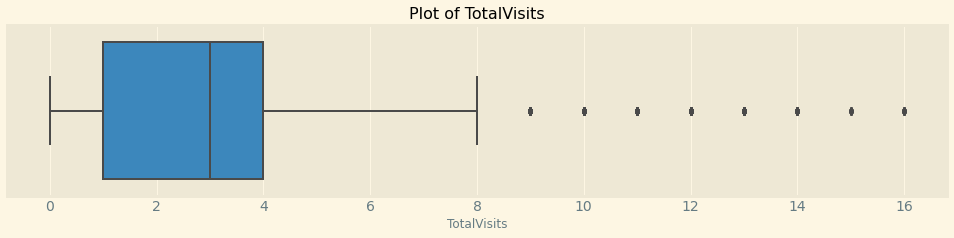

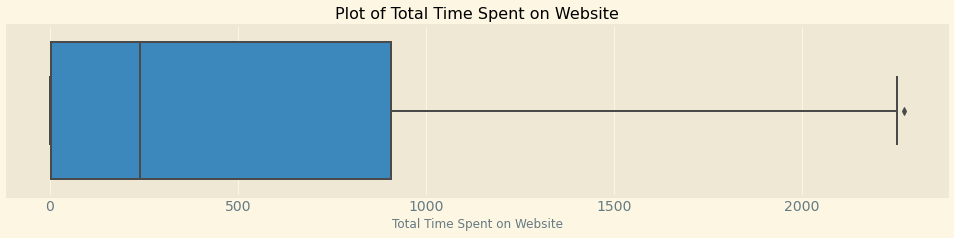

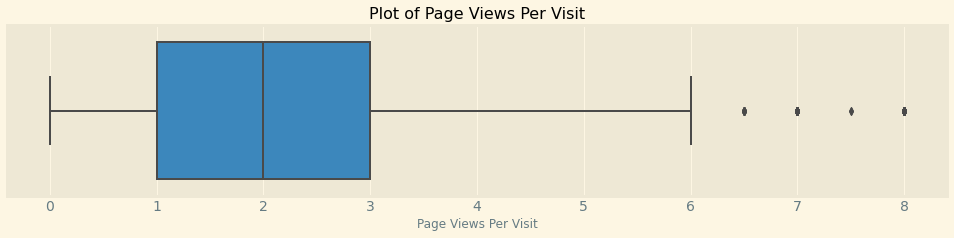

In [ ]:
plt.style.use('Solarize_Light2')
for x,y in num_dict.items():
    plt.figure(figsize=(15,10))
    plt.subplot(3, 1, x)
    sns.boxplot(Leads[y])
    plt.title('Plot of {0}'.format(y))
    plt.show() 

In [ ]:
#checking missing values in remaining columns

Leads.isnull().sum()

Lead Number                         0
Lead Origin                         0
Lead Source                        29
Do Not Email                        0
Do Not Call                         0
Converted                           0
TotalVisits                         0
Total Time Spent on Website         0
Page Views Per Visit                0
Specialization                      0
What is your current occupation     0
City                                0
dtype: int64

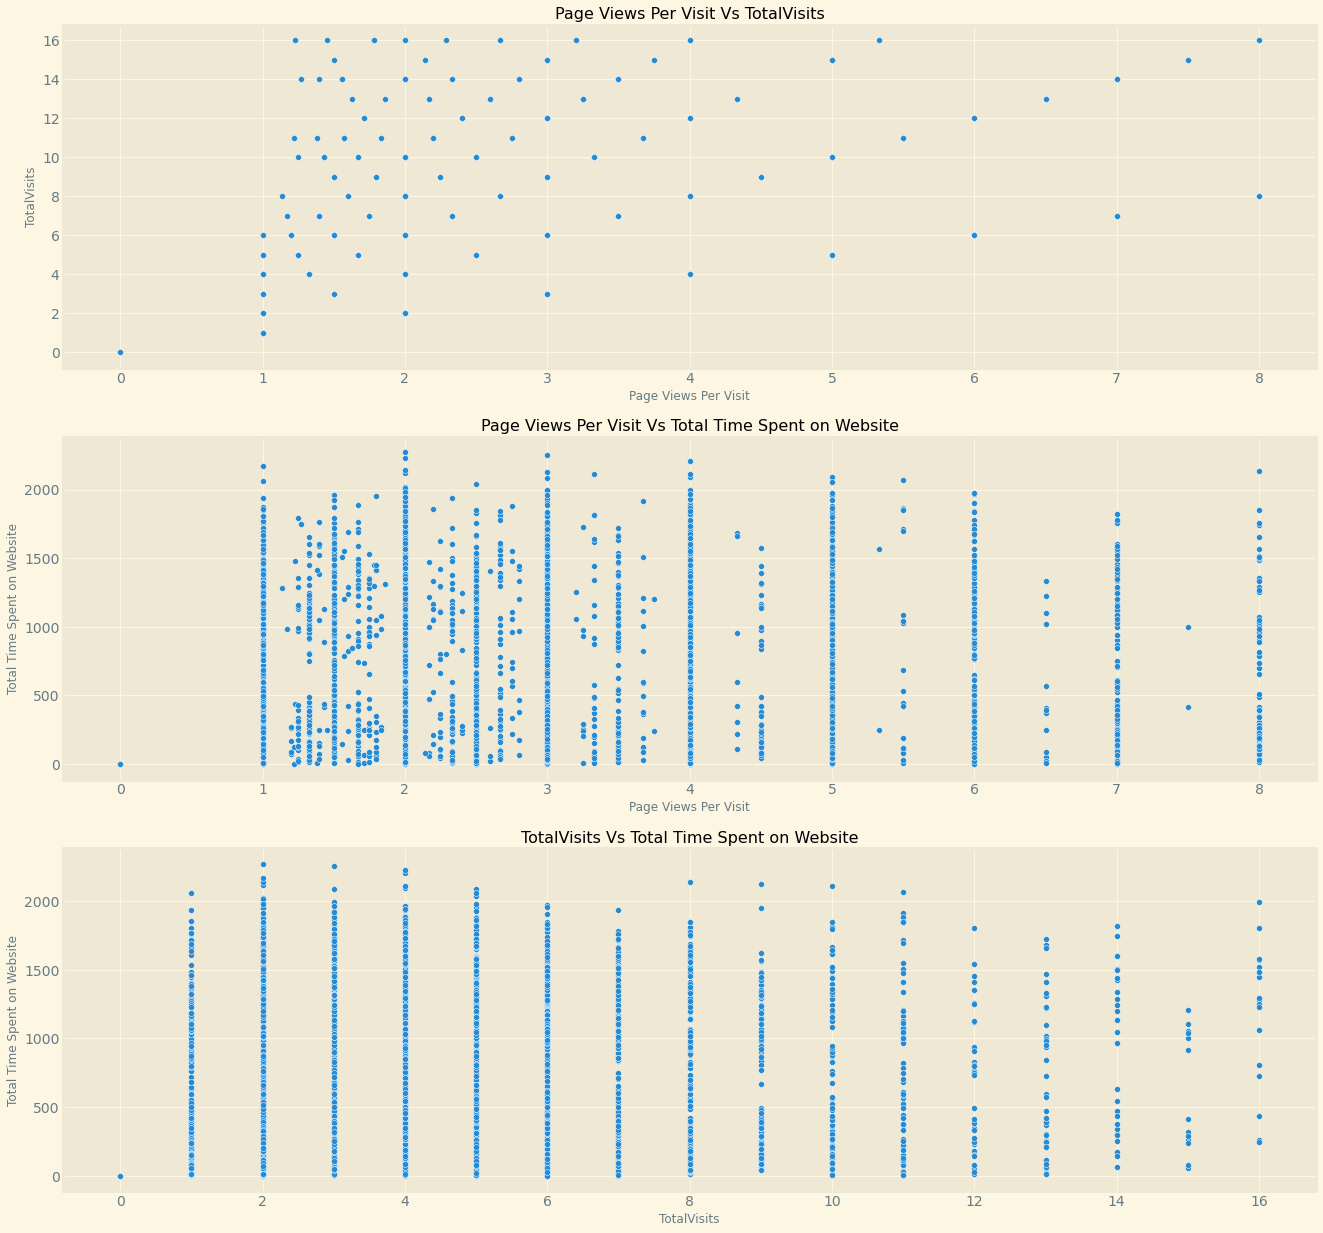

In [ ]:
# Numerical columns Bivariate analysis:

plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.scatterplot(data = Leads, x='Page Views Per Visit', y='TotalVisits')
plt.title('Page Views Per Visit Vs TotalVisits')

plt.subplot(3,1,2)
sns.scatterplot(data = Leads, x='Page Views Per Visit', y='Total Time Spent on Website')
plt.title('Page Views Per Visit Vs Total Time Spent on Website')

plt.subplot(3,1,3)
sns.scatterplot(data = Leads, x='TotalVisits', y='Total Time Spent on Website')
plt.title('TotalVisits Vs Total Time Spent on Website')
plt.show()

## Data Preparation 

In [ ]:
#binarizing the 'Do Not Call' and 'Do Not Email' columns

Leads[['Do Not Call','Do Not Email']] = Leads[['Do Not Call','Do Not Email']].apply(lambda x : x.map({'Yes': 1, "No": 0}))

In [ ]:
#checking the 'Do Not Call' column

Leads['Do Not Call'].value_counts(normalize=True)

0    0.999775
1    0.000225
Name: Do Not Call, dtype: float64

In [ ]:
#checking the 'Do Not Email' column

Leads['Do Not Email'].value_counts(normalize=True)

0    0.922177
1    0.077823
Name: Do Not Email, dtype: float64

In [ ]:
#checking the conversion rate:

sum(Leads['Converted']/len(Leads['Converted']))*100

37.97795771479696

In [ ]:
final_rows = Leads.shape[0]
final_rows

8892

In [ ]:
# Calculating the perctange of rows dropped to initial rows of tye dataset:
print((final_rows/initial_rows)*100)

96.23376623376623


Hence, even after dropping some rows, we still have 96% rows of the original dataset. We may now move to our next step

#### Creating Dummy Variables

In [ ]:
#categorical columns:

cat_cols = ['Lead Origin','Lead Source','Specialization','What is your current occupation','City']

temp = pd.get_dummies(Leads[cat_cols])
Leads = pd.concat([Leads,temp], axis=1)
Leads = Leads.drop(cat_cols, axis=1)
Leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other SocialMedia Sites,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Specializations,Specialization_Industry Specializations,Specialization_Management Specializations,Specialization_Not Specified,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0,0,0.0,0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


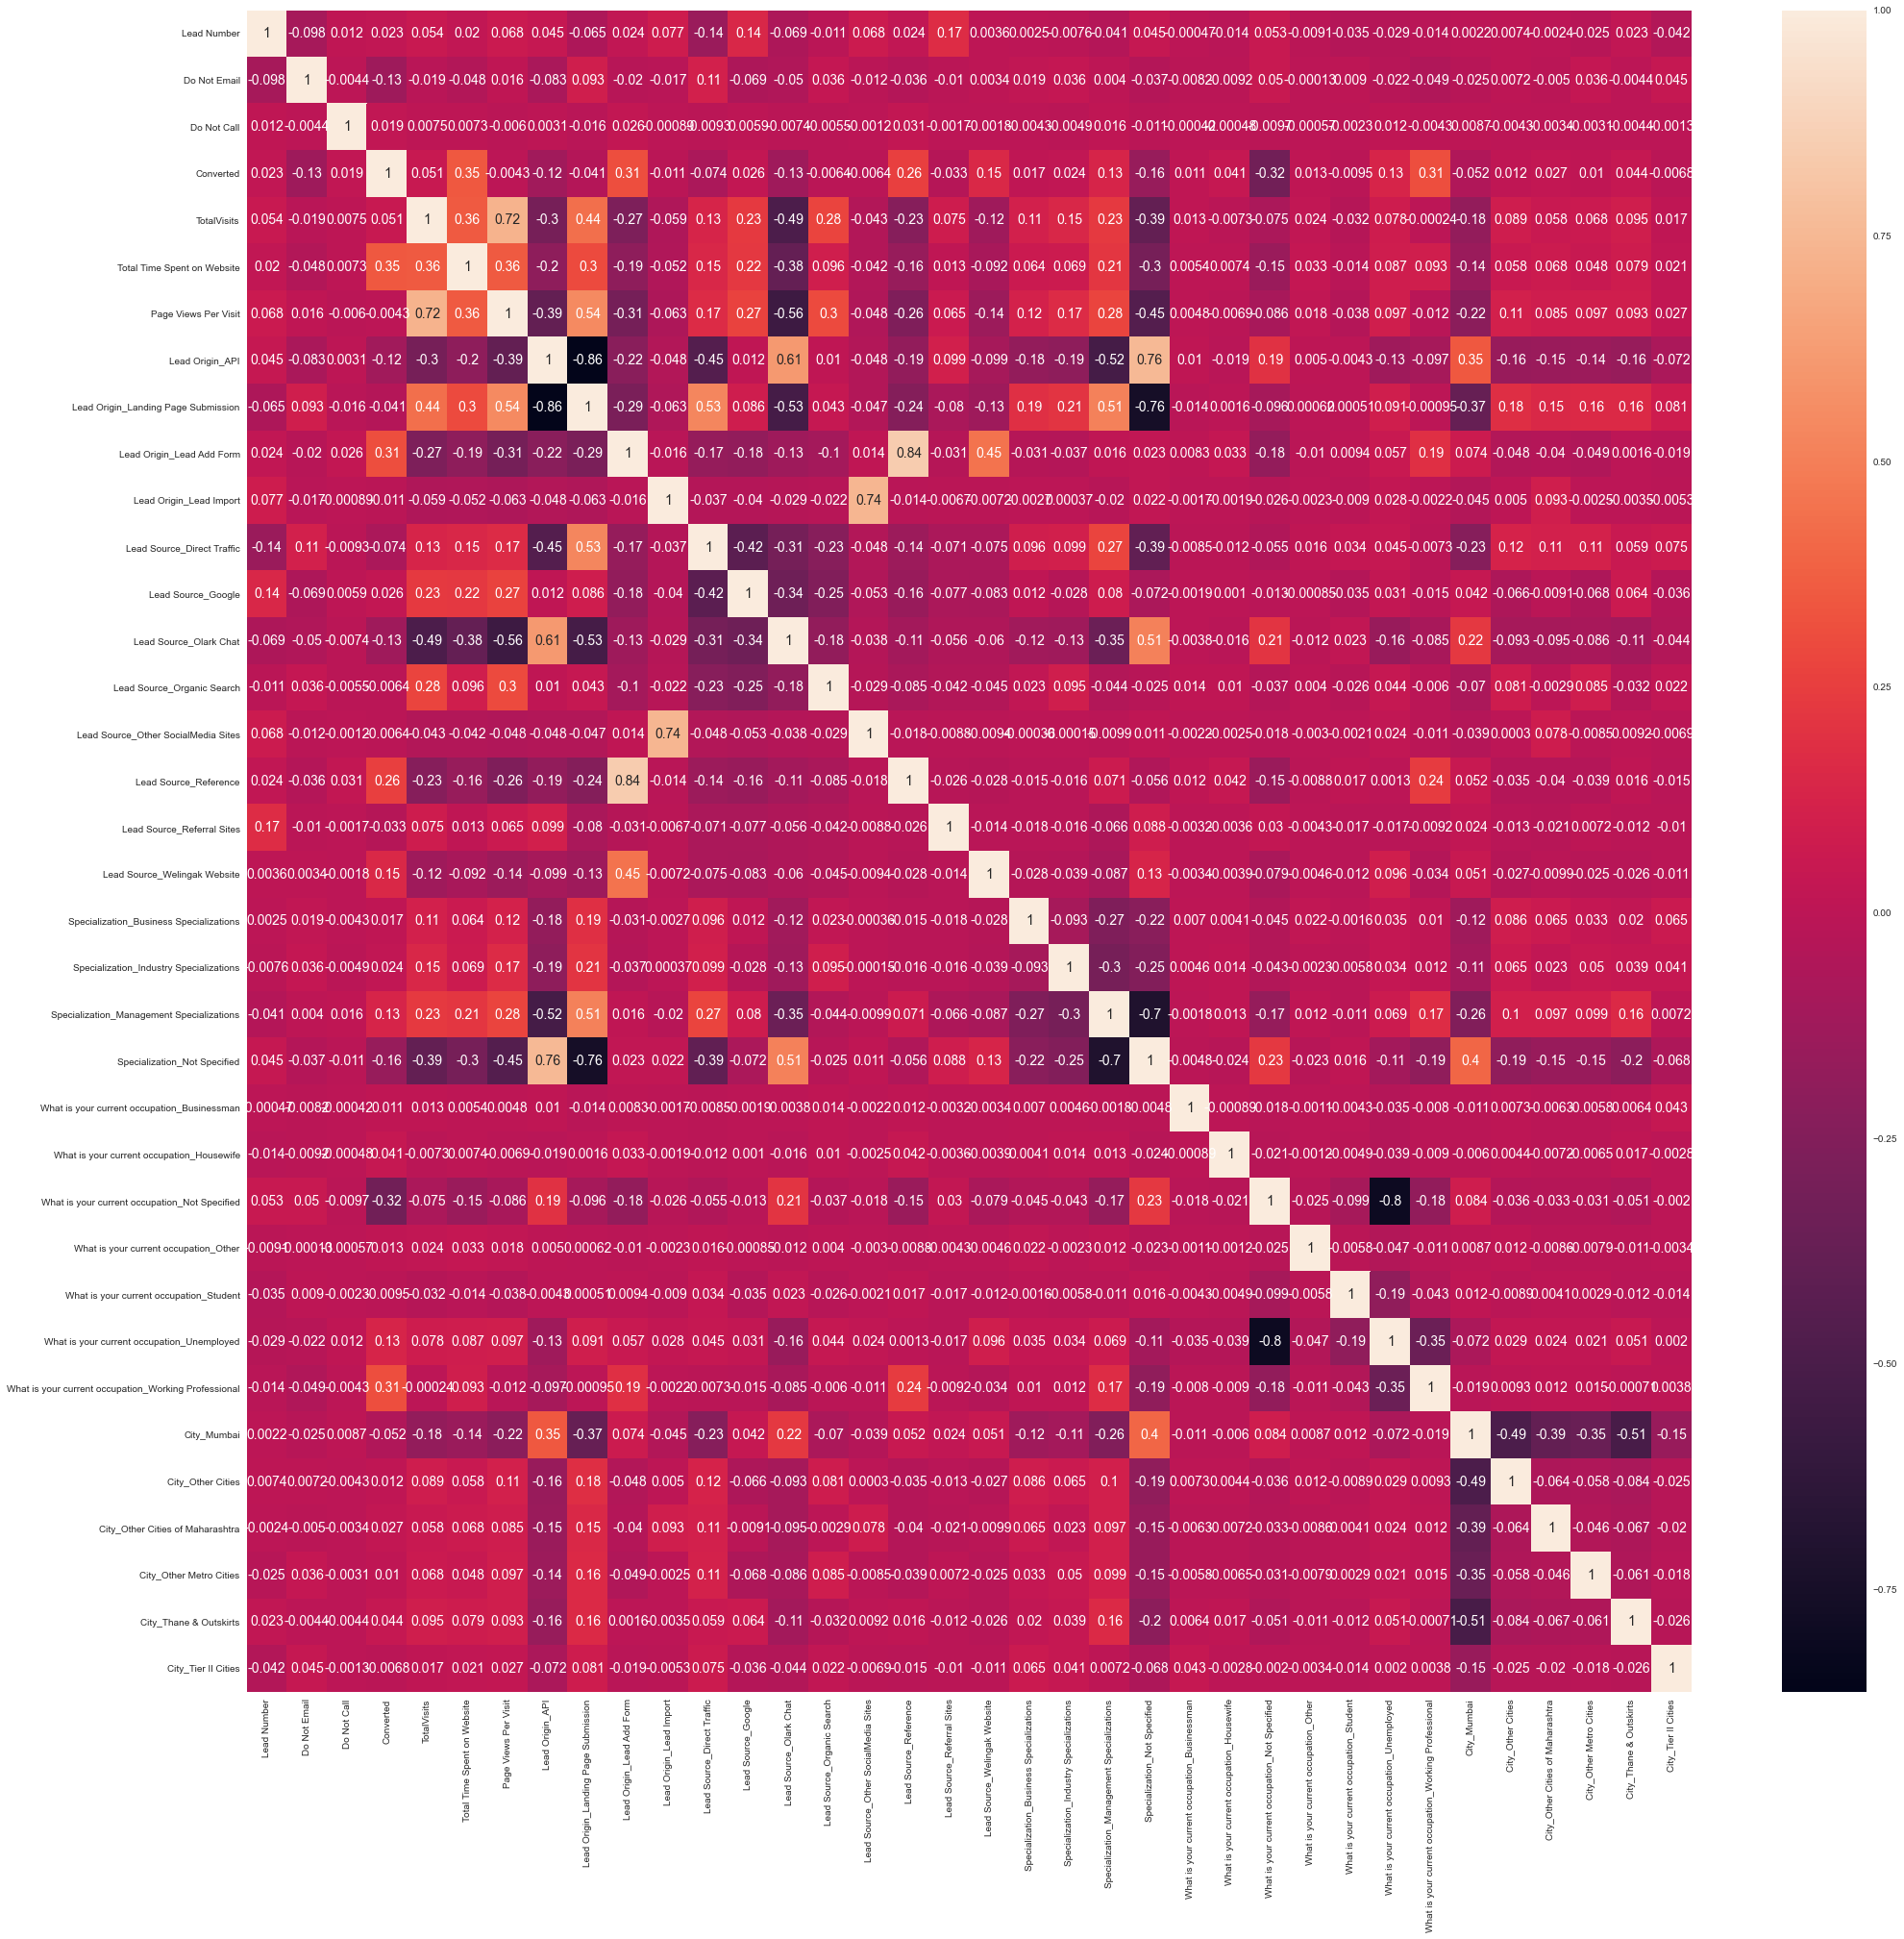

In [ ]:
#checking the correlations:

plt.style.use('seaborn')
plt.figure(figsize=(30,30))
sns.heatmap(Leads.corr(), annot=True)
plt.show()

In [ ]:
# removing Not specified column as it has high correlation:

Leads = Leads.drop(['Specialization_Not Specified','What is your current occupation_Not Specified'],axis=1)

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = Leads.drop(['Lead Number','Converted'], axis =1)
y = Leads['Converted']
X_train, X_test, y_train, y_test = train_test_split(X , y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6224 entries, 8736 to 5857
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6224 non-null   int64  
 1   Do Not Call                                           6224 non-null   int64  
 2   TotalVisits                                           6224 non-null   float64
 3   Total Time Spent on Website                           6224 non-null   int64  
 4   Page Views Per Visit                                  6224 non-null   float64
 5   Lead Origin_API                                       6224 non-null   uint8  
 6   Lead Origin_Landing Page Submission                   6224 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6224 non-null   uint8  
 8   Lead Origin_Lead Import                               6

In [ ]:
#scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other SocialMedia Sites,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Specializations,Specialization_Industry Specializations,Specialization_Management Specializations,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
8736,0,0,-1.092137,-0.883156,-1.214997,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4453,0,0,-0.374234,2.003808,-0.112712,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
625,1,0,-1.092137,-0.883156,-1.214997,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1525,0,0,-0.015283,0.552078,0.438430,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3381,0,0,0.343668,0.616232,0.989572,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


### Building the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#running the RFE with variable equal to 15

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_API', False, 6),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Other SocialMedia Sites', True, 1),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Specializations', False, 2),
 ('Specialization_Industry Specializations', False, 3),
 ('Specialization_Management Specializations', False, 4),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 

In [ ]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other SocialMedia Sites', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Specialization_Business Specializations',
       'Specialization_Industry Specializations',
       'Specialization_Management Specializations', 'City_Mumbai',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities'],
      dtype='object')

### Statsmodel for detailed components

In [ ]:
#creating a X_test dataframe using RFE Model

X_train_rfe= X_train[X_train.columns[rfe.support_]]

In [ ]:
#adding constant variable

import statsmodels.api as sm

X_train_rfe= sm.add_constant(X_train_rfe)

In [ ]:
#create a first fitted model

lm_model = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial()).fit()
print(lm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2795.6
Date:                Mon, 09 Aug 2021   Deviance:                       5591.2
Time:                        23:07:20   Pearson chi2:                 6.17e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
#dropping 'What is your current occupation_Businessman' as it has high p-value

X_train_rfe_2 = X_train_rfe.drop(["What is your current occupation_Businessman"], axis = 1)

In [ ]:
#rebuilding the model without 'What is your current occupation_Businessman' column

X_train_rfe_2= sm.add_constant(X_train_rfe_2)
lm_2= sm.GLM(y_train,X_train_rfe_2, family = sm.families.Binomial())
lm_model_2= lm_2.fit()
print(lm_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2799.2
Date:                Mon, 09 Aug 2021   Deviance:                       5598.4
Time:                        23:07:20   Pearson chi2:                 6.18e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
#dropping 'What is your current occupation_Housewife' as it has high p-value

X_train_rfe_3 = X_train_rfe_2.drop(["What is your current occupation_Housewife"], axis = 1)

In [ ]:
#rebuilding the model without 'What is your current occupation_Housewife' column

X_train_rfe_3= sm.add_constant(X_train_rfe_3)
lm_3= sm.GLM(y_train,X_train_rfe_3, family = sm.families.Binomial())
lm_model_3= lm_3.fit()
print(lm_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.6
Date:                Mon, 09 Aug 2021   Deviance:                       5613.3
Time:                        23:07:20   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
#dropping 'Lead Source_Other SocialMedia Sites' as it has high p-value

X_train_rfe_4 = X_train_rfe_3.drop(["Lead Source_Other SocialMedia Sites"], axis = 1)

In [ ]:
#rebuilding the model without 'Lead Source_Other SocialMedia Sites' column

X_train_rfe_4= sm.add_constant(X_train_rfe_4)
lm_4= sm.GLM(y_train,X_train_rfe_4, family = sm.families.Binomial())
lm_model_4= lm_4.fit()
print(lm_model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6211
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2807.6
Date:                Mon, 09 Aug 2021   Deviance:                       5615.3
Time:                        23:07:21   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe_4= X_train_rfe_4.drop(['const'], axis=1)
vif= pd.DataFrame()
vif['Features']= X_train_rfe_4.columns
vif['VIF']= [variance_inflation_factor(X_train_rfe_4.values,i) for i in range(len(X_train_rfe_4.columns))]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.53
3,Lead Source_Direct Traffic,1.72
4,Lead Source_Google,1.72
2,Lead Origin_Lead Add Form,1.65
7,Lead Source_Welingak Website,1.31
5,Lead Source_Organic Search,1.29
11,What is your current occupation_Working Profes...,1.28
1,Total Time Spent on Website,1.14
0,Do Not Email,1.11
9,What is your current occupation_Student,1.05


We can clearly see that all feature variables have low Variance Inflation Factor i.e. less than 5 and hence no more dropping of features are necessary

### Making Predictions Using the Final Model

In [ ]:
X_train_rfe_4 = sm.add_constant(X_train_rfe_4)
y_train_pred = lm_model_4.predict(X_train_rfe_4)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32909775, 0.78138592, 0.03399959, 0.92879305, 0.43678082,
       0.12083474, 0.71063871, 0.24710452, 0.26376915, 0.78361883])

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred,'Lead_Number':y_train.index})
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Number,Predicted
0,0,0.329098,8736,0
1,1,0.781386,4453,1
2,0,0.034000,625,0
3,0,0.928793,1525,1
4,1,0.436781,3381,0


In [ ]:
#creating the Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

confusion = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
print(confusion)

[[3437  416]
 [ 861 1510]]


In [ ]:
#checking the Accuracy of the train dataset

accuracy = accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
print('\n Accuracy: ', accuracy)


 Accuracy:  0.7948264781491002


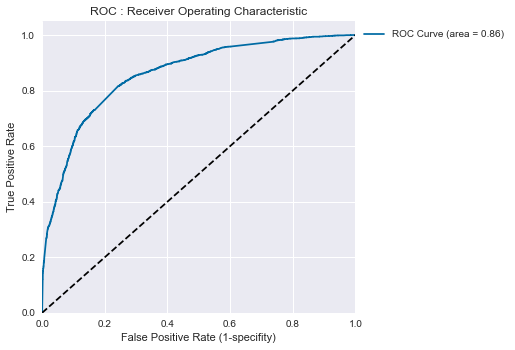

In [ ]:
#plotting the ROC Curve

def roc_draw(actual, prob):
    plt.style.use('tableau-colorblind10')
    fpr, tpr, threshold = roc_curve(actual, prob, drop_intermediate=True)
    auc = roc_auc_score(actual, prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label = 'ROC Curve (area = %0.2f)'% auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate (1-specifity)')
    plt.ylabel('True Positive Rate')
    plt.title('ROC : Receiver Operating Characteristic')
    plt.legend(loc='upper left',bbox_to_anchor=[1,1])
    plt.show()

    return None

roc_draw(y_train_pred_final['Converted'],y_train_pred_final['Converted_Prob'])

The ROC curve shows the relation between the TPR and FPR, in our case, it has an area under the curve value = 0.86 which is just appropriate. Also, the curve is steeper towards the upper left corner which confirms that our model is accurate

In [ ]:
#checking the predicted values for all thresholds to be 0 to 1

nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.329098,8736,0,1,1,1,1,0,0,0,0,0,0
1,1,0.781386,4453,1,1,1,1,1,1,1,1,1,0,0
2,0,0.034000,625,0,1,0,0,0,0,0,0,0,0,0
3,0,0.928793,1525,1,1,1,1,1,1,1,1,1,1,1
4,1,0.436781,3381,0,1,1,1,1,1,0,0,0,0,0


In [ ]:
#calculating the accuracy,sensitivity and specificity for various probability cutoffs

cutoff = pd.DataFrame(columns = ['Prob','Accuracy','Sensitivity','Specificity'])

nums = [ float(x)/10 for x in range(10)]
for i in nums:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    accuracy = (cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])
    sensitivity = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff.loc[i] = [i, accuracy, sensitivity, specificity]
cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.380945,1.000000,0.000000
0.1,0.1,0.521690,0.982286,0.238256
0.2,0.2,0.693605,0.904682,0.563717
0.3,0.3,0.772012,0.830030,0.736309
0.4,0.4,0.799004,0.695487,0.862704
0.5,0.5,0.794826,0.636862,0.892032
0.6,0.6,0.780688,0.565162,0.913314
0.7,0.7,0.758676,0.462674,0.940825
0.8,0.8,0.733451,0.353859,0.967039
0.9,0.9,0.687821,0.190637,0.993771


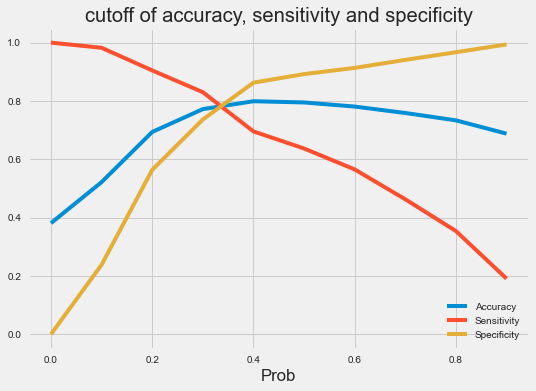

In [ ]:
#plotting the cutoff of accuracy, sensitivity and specificity
plt.style.use('fivethirtyeight')
cutoff.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.title('cutoff of accuracy, sensitivity and specificity')
plt.show()

The above curve shows the opimal point of cut off which should be taken into consideration while allocating 0s and 1s based on probabilities. Here in our case, its 0.3

In [ ]:
#From the curve above, 0.3 is the optimum point to take it as a cutoff probability

y_train_pred_final['Final_Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.329098,8736,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.781386,4453,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.034000,625,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.928793,1525,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.436781,3381,0,1,1,1,1,1,0,0,0,0,0,1


In [ ]:
#assigning Lead_Score to the training dataset

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round((x*100),2))
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.329098,8736,0,1,1,1,1,0,0,0,0,0,0,1,32.91
1,1,0.781386,4453,1,1,1,1,1,1,1,1,1,0,0,1,78.14
2,0,0.034000,625,0,1,0,0,0,0,0,0,0,0,0,0,3.40
3,0,0.928793,1525,1,1,1,1,1,1,1,1,1,1,1,1,92.88
4,1,0.436781,3381,0,1,1,1,1,1,0,0,0,0,0,1,43.68


### Model Evaluation

In [ ]:
#checking the final Confusion Matrix of the training dataset

confusion_final = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Final_Predicted'])
print(confusion_final)

[[2837 1016]
 [ 403 1968]]


In [ ]:
#defining TP,TN, FP and FN of the training dtataset

TP = confusion_final[1,1] #True Positive
TN = confusion_final[0,0] #True Negative
FP = confusion_final[0,1] #False Positive
FN = confusion_final[1,0] #False Negative

In [ ]:
#checking the final evaluation metrics of the training dataset

accuracy_score_final = accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Final_Predicted'])
print('\n Accuracy: ', accuracy_score_final)

Sensitivity = TP/(TP+FN)
print('\n Sensitivity: ', Sensitivity)


Specificity = TN/(TN+FP)
print('\n Specificity: ', Specificity)

False_Positive_Rate = FP/(FP+TN)
print('\n False_Positive_Rate: ', False_Positive_Rate)

Positive_Predictive_Value = TP/(TP+FP)
print('\n Positive_Predictive_Value: ', Positive_Predictive_Value)

Precision = TP/(TP+FP)
print('\n Precision: ', Precision)

F1_Score = (2 * Precision * Sensitivity)/(Precision + Sensitivity )
print('\n F1_Score: ', F1_Score)


 Accuracy:  0.7720115681233933

 Sensitivity:  0.8300295234078447

 Specificity:  0.7363093693226057

 False_Positive_Rate:  0.26369063067739423

 Positive_Predictive_Value:  0.6595174262734584

 Precision:  0.6595174262734584

 F1_Score:  0.735014005602241


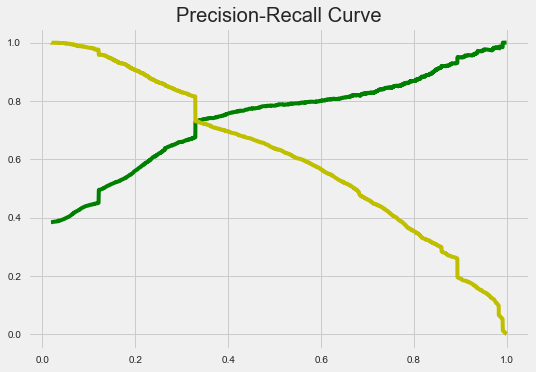

In [ ]:
#plotting the Precision-Recall curve for training dataset

from sklearn.metrics import precision_recall_curve
p, r, threshold = precision_recall_curve(y_train_pred_final['Converted'],y_train_pred_final['Converted_Prob'])
plt.style.use('_classic_test_patch')
plt.plot(threshold,p[:-1],'g-')
plt.plot(threshold,r[:-1],'y-')
plt.title('Precision-Recall'' Curve')
plt.show()

The above graphs show the cut off points of the precision and recall based on the model. We'll consider the optimal cutoff to be 0.3

In [ ]:
#determining Hot_Leads for train dataset

Hot_Leads_train = y_train_pred_final[y_train_pred_final['Lead_Score']>=85]
Hot_Leads_train.sort_values(by='Lead_Score', ascending = False)

,Converted,Converted_Prob,Lead_Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
5764,1,0.998956,2984,1,1,1,1,1,1,1,1,1,1,1,1,99.90
466,1,0.998549,7187,1,1,1,1,1,1,1,1,1,1,1,1,99.85
684,1,0.998383,7211,1,1,1,1,1,1,1,1,1,1,1,1,99.84
2788,1,0.998264,7219,1,1,1,1,1,1,1,1,1,1,1,1,99.83
4931,1,0.998182,1559,1,1,1,1,1,1,1,1,1,1,1,1,99.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,1,0.850563,4737,1,1,1,1,1,1,1,1,1,1,0,1,85.06
217,1,0.850097,6265,1,1,1,1,1,1,1,1,1,1,0,1,85.01
1119,1,0.850049,7489,1,1,1,1,1,1,1,1,1,1,0,1,85.00
2069,1,0.850007,7570,1,1,1,1,1,1,1,1,1,1,0,1,85.00


### Evaluating the test dataset

In [ ]:
#scaling on test dataset

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other SocialMedia Sites,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Specializations,Specialization_Industry Specializations,Specialization_Management Specializations,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
2146,0,0,2.138425,-0.369918,0.438430,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
400,1,0,0.343668,1.598716,0.989572,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2207,0,0,-1.092137,-0.883156,-1.214997,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
574,0,0,1.420522,-0.177453,2.642999,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5268,1,0,-0.015283,-0.786007,0.438430,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
X_test_4= X_test[X_train_rfe_4.drop('const',axis=1).columns]

#adding constant
X_test_4 = sm.add_constant(X_test_4)

#making prediction on test dataset
y_test_pred = lm_model_4.predict(X_test_4)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.06834039, 0.36944643, 0.12083474, 0.11649025, 0.04067366,
       0.20781155, 0.20592195, 0.13672158, 0.78086824, 0.17074073])

In [ ]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values,'Converted_Prob':y_test_pred,'Lead_Number':y_test.index})
y_test_pred_final['Predicted'] = y_test_pred_final['Converted_Prob'].apply(lambda x: 1 if x>0.3 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,Lead_Number,Predicted
0,0,0.068340,2146,0
1,1,0.369446,400,1
2,0,0.120835,2207,0
3,0,0.116490,574,0
4,0,0.040674,5268,0


In [ ]:
#checking the Accuracy of the test dataset

accuracy = accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])
print('\n Accuracy: ', accuracy)


 Accuracy:  0.7679910044977512


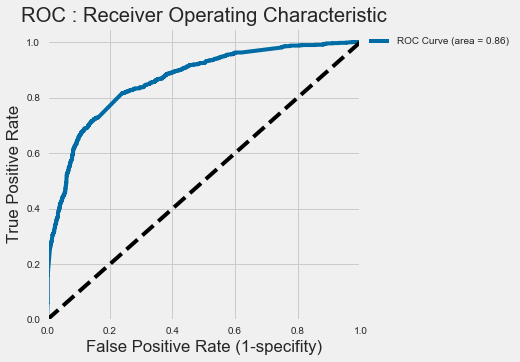

In [ ]:
#plotting the ROC curve

roc_draw(y_test_pred_final['Converted'],y_test_pred_final['Converted_Prob'])

Just like before, the ROC curve for the test dataset also has a 0.86 area under the curve score.

In [ ]:
#assigning Lead_Score to the test dataset

y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_Prob.map( lambda x: round((x*100),2))
y_test_pred_final.head()

,Converted,Converted_Prob,Lead_Number,Predicted,Lead_Score
0,0,0.068340,2146,0,6.83
1,1,0.369446,400,1,36.94
2,0,0.120835,2207,0,12.08
3,0,0.116490,574,0,11.65
4,0,0.040674,5268,0,4.07


### Model Evaluation

In [ ]:
#checking the final Confusion Matrix of the training dataset

confusion_test = confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])
print(confusion_test)

[[1217  445]
 [ 174  832]]


In [ ]:
#defining TP,TN, FP and FN of the test dtataset

TP_test = confusion_test[1,1] #True Positive
TN_test = confusion_test[0,0] #True Negative
FP_test = confusion_test[0,1] #False Positive
FN_test = confusion_test[1,0] #False Negative

In [ ]:
#checking the final evaluation metrics of the training dataset

accuracy_score_test = accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])
print('\n Accuracy: ', accuracy_score_test)

Sensitivity_Test = TP_test/(TP_test+FN_test)
print('\n Sensitivity: ', Sensitivity_Test)


Specificity_Test = TN_test/(TN_test+FP_test)
print('\n Specificity: ', Specificity_Test)

False_Positive_Rate_Test = FP_test/(FP_test+TN_test)
print('\n False_Positive_Rate: ', False_Positive_Rate_Test)

Positive_Predictive_Value_Test = TP_test/(TP_test+FP_test)
print('\n Positive_Predictive_Value: ', Positive_Predictive_Value_Test)

Precision_Test = TP_test/(TP_test+FP_test)
print('\n Precision: ', Precision_Test)

F1_Score_Test = (2 * Precision_Test * Sensitivity_Test)/(Precision_Test + Sensitivity_Test)
print('\n F1_Score: ', F1_Score_Test)


 Accuracy:  0.7679910044977512

 Sensitivity:  0.827037773359841

 Specificity:  0.7322503008423586

 False_Positive_Rate:  0.2677496991576414

 Positive_Predictive_Value:  0.6515270164447925

 Precision:  0.6515270164447925

 F1_Score:  0.7288655278142795


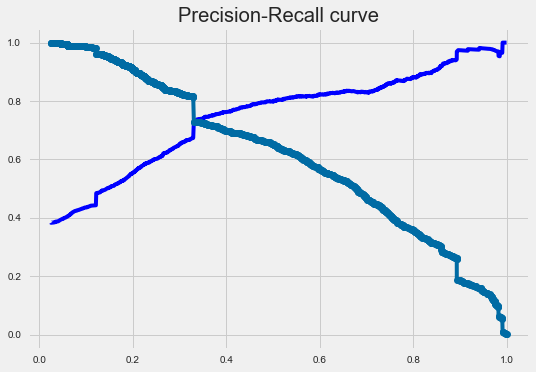

In [ ]:
#plotting the Precision-Recall curve for test dataset

p, r, threshold = precision_recall_curve(y_test_pred_final['Converted'],y_test_pred_final['Converted_Prob'])
plt.style.use('_classic_test_patch')
plt.plot(threshold,p[:-1],'b-')
plt.plot(threshold,r[:-1],'o-')
plt.title('Precision-Recall curve')
plt.show()

As noted earlier, the cut off of train dataset was 0.3, the same value can be observed for the test dataset as well.

In [ ]:
#determining Hot_Leads for test dataset

Hot_Leads_test = y_test_pred_final[y_test_pred_final['Lead_Score']>=85]
Hot_Leads_test.sort_values(by='Lead_Score', ascending = False)

,Converted,Converted_Prob,Lead_Number,Predicted,Lead_Score
871,1,0.999595,818,1,99.96
825,1,0.999042,4613,1,99.90
1561,1,0.998492,8120,1,99.85
145,1,0.996920,4123,1,99.69
546,1,0.996608,739,1,99.66
...,...,...,...,...,...
1990,1,0.852096,1979,1,85.21
611,1,0.851827,5659,1,85.18
2529,1,0.851075,1655,1,85.11
1749,0,0.851075,36,1,85.11


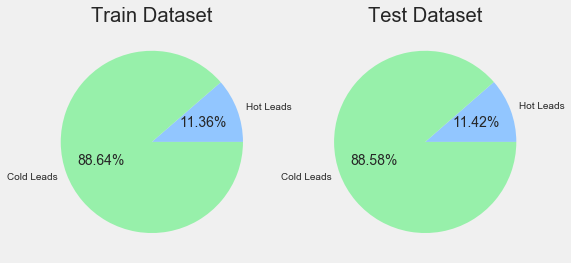

In [ ]:
# Plotting pie charts to understand the contribution of Hot Leads compared to overall Leads:
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(1,2)
label = ['Hot Leads','Cold Leads']
ax[0].pie([Hot_Leads_train.shape[0],y_train_pred_final.shape[0]], labels =label, autopct='%1.2f%%')
ax[0].set_title('Train Dataset')

ax[1].pie([Hot_Leads_test.shape[0],y_test_pred_final.shape[0]], labels =label, autopct='%1.2f%%')
ax[1].set_title('Test Dataset')
plt.show()

From the above pie charts, we observe that the training dataset has a conversion rate of `11.36%` compared to the Test dataset which has a value of `11.4%`

### Determining Feature Importance

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
final_features = lm_model_4.params
final_features

const                                                  -1.01
Do Not Email                                           -1.36
Total Time Spent on Website                             1.10
Lead Origin_Lead Add Form                               2.83
Lead Source_Direct Traffic                             -1.19
Lead Source_Google                                     -0.82
Lead Source_Organic Search                             -1.02
Lead Source_Referral Sites                             -1.62
Lead Source_Welingak Website                            1.89
What is your current occupation_Other                   1.40
What is your current occupation_Student                 0.96
What is your current occupation_Unemployed              1.27
What is your current occupation_Working Professional    3.79
dtype: float64

#### Selecting Top 3 features which contribute most towards the probability of a lead getting converted


In [ ]:
final_features.reset_index().sort_values(by=0, ascending=False).head(3)

,index,0
12,What is your current occupation_Working Profes...,3.79
3,Lead Origin_Lead Add Form,2.83
8,Lead Source_Welingak Website,1.89


### Observations

<I>- Refer the table below to check the metrics calculated for the Train and the Test dataset:</I>

|Parameters|Train|Test|
|---|---|---|
|Accuracy|`77.2`|`76.8`|
|Sensitivity|`83`|`82.7`|
|Specificity|`73.6`|`73.2`|
|False Positive Rate|`26.3`|`26.7`|
|True Positive Rate|`83`|`82.7`|
|Positive Predicted Value|`65.9`|`65.1`|
|Precision|`65.9`|`65.1`|
|Recall|`83`|`82.7`|
|F1|`73.5`|`72.8`|

<I>- Depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and Specificity of the model. High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted.</I>



<I>- As per the business problem, CEO needed a target lead conversion rate to be around 80%, which is achieved by adjusting the value of sensitivity above 80%. Clearly, this was witnessed from the model built.</I>


<I>- Finally, a lead score was imparted based upon the probabilty being predicted from the model which ultimately helped in identifying the Hot Leads.<I/>
    
    
<img src = "https://etiquettejulie.com/wp-content/uploads/2017/01/thank-you-from-christian-vision-alliance.jpg" width=400 height=400>